# ¿Cuál es el mensaje escondido?
En este ejercicio utilizaremos la funcionalidad de numpy para tratar de resolver el acertijo planeado.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRVrjpKx4sHO1Yo-SQTeRuZb4exdo84SGnq9ZcDKzeTneuaN_GXxz4JKplrmAECkvxlpRk&usqp=CAU)



__Objetivo__: Resuelve las pistas las pistas y descubre cuál es el mensaje escondido. Lee cuidadosamente las pistas proporcionadas y codifica los elementos que se piden.

### Conocimientos requeridos:
- __numpy__
    - ```array```
    - ```array_split```
    - ```reshape```

    - ```vstack```, ```hstack```
    - __filtros__
    - __máscaras__
- __matplotlib__
    - ```imshow```




## Paso 1
Descarga los archivos ejecutando el código de la siguiente celda.

In [12]:
%%capture
!wget https://raw.githubusercontent.com/DRMiguelAR/Herramientas_Analisis/master/who/who.dat
!wget https://raw.githubusercontent.com/DRMiguelAR/Herramientas_Analisis/master/who/criba.dat

## Paso 2
Abre los archivos _who.dat_ y _criba.dat_. Ambos contienen arreglos numéricos de enteros, en una sola linea, separados por espacios. Convierte la la información en arreglos de _numpy_.

In [13]:
import numpy as np

def transform_to_np_arr (file_name:str):
  with open(file_name, 'r') as file:
    data = file.read().split(' ')
    return np.array(data).astype(int)

who_array = transform_to_np_arr('who.dat.txt')
criba_array = transform_to_np_arr('criba.dat.txt')


El archivo _who_ contiene información escondida, pero el tiempo ha hecho que el mensaje no esté muy claro. Revisa los contenidos del arreglo para ver si logras descubrir algún patrón. _(Exploración libre)_

In [14]:
print(who_array[0:100])
print(criba_array[0:100])

[1485 2109  503  426 2446 2812 2657 1599 2396 1822 2261 1316 2427 1300
 1351 2168  231 1420 1320 1454 2616 2328  251 1498 1330 1469 2617 1554
 2064 2664  168 1542 1956 2597 2919 2942  736 1716 2672 1035  200 2601
 1378  948  876 2814  476  105  984 1481  638  982 1114 2632  778 2639
 2881 1879  570  139 2988 2559 2243 1713  290  587  404  977 2181   12
 2858 1397 2190 1308 2415 2131  106 1275  979  266  426  131 1441 2799
 1071  596 1377   85 1142  654 2720  841 2766 1119 2477 1886 2616 1848
  904 1336]
[  0  12  13  17  22  29  35  36  37  38  48  61  62  78  87  88  90 101
 105 107 111 112 115 119 121 131 135 150 151 154 164 173 176 179 182 190
 192 200 204 217 219 224 234 237 246 247 253 263 266 268 269 272 279 282
 289 290 294 300 305 311 312 322 329 330 337 338 340 354 355 359 360 363
 367 370 372 380 389 390 393 394 397 399 401 410 415 422 427 430 435 436
 439 440 443 445 449 452 455 475 476 477]


__Contexto de los datos:__ Unos arqueólogos han descubierto en unas ciertas ruinas dos series de números que a su parecer esconden la clave para la paz mundial. Les han llamado el arreglo _who_ y el arreglo _criba_.

## Pista 1
- Cada número del arreglo _who_ fue calculado meticulosamente por unos monjes tibetanos que lograban descubrir un nuevo número cada día, el cual apuntaban de manera secuencial en una lista.

- Sin embargo, los monjes cumplían fielmente su descanso de fin de semana, y organizaban fiestas legendarias cada sábado y domingo. Esos días agregaban el número correspondiente al arreglo, pero en lugar de calcular el siguiente número de manera adecuada, sólo escribían un número aleatorio al final de la fiesta de ese día.

- Si se sabe que los monjes iniciaron su trabajo un __lunes__, crea una máscara de _numpy_ que se pueda aplicar sobre el arreglo _who_ de manera que remueva los elementos basura y encontrar __el verdadero arreglo *who*__.  

- ¿Cuántos elementos quedaron después de filtrar?

In [15]:
size = who_array.size
mask_who = [False if (i % 7 == 5 or i % 7 == 6) else True for i in range(size)]
print(mask_who[0:100])

#np.tile (mask, len *who / 7)
#who[:, mask]
#who1[:,:5].flatten ()

[True, True, True, True, True, False, False, True, True, True, True, True, False, False, True, True, True, True, True, False, False, True, True, True, True, True, False, False, True, True, True, True, True, False, False, True, True, True, True, True, False, False, True, True, True, True, True, False, False, True, True, True, True, True, False, False, True, True, True, True, True, False, False, True, True, True, True, True, False, False, True, True, True, True, True, False, False, True, True, True, True, True, False, False, True, True, True, True, True, False, False, True, True, True, True, True, False, False, True, True]


In [16]:
print (who_array.size)
print(who_array[mask_who].size)
masked_who = who_array[mask_who]

1400000
1000000


## Pista 2

Si se utilizan los números del arreglo _criba_ para sólo obtener el millón de elementos adecuados del verdadero arreglo _who_, de manera que cada número de la criba represente la posición a obtener de _who_,se descubre un patrón que puede iluminar el camino correcto.
- Utiliza la _criba_ para elegir los índices correctos del arreglo _who_.
- ¿Cuántos elementos quedaron?

In [17]:
print (criba_array[0:100])
print (who_array[0:100])
print (masked_who[0:100])
who_criba = masked_who[criba_array]
print (masked_who.size)
print (who_criba.size)
print (who_criba[0:100])

[  0  12  13  17  22  29  35  36  37  38  48  61  62  78  87  88  90 101
 105 107 111 112 115 119 121 131 135 150 151 154 164 173 176 179 182 190
 192 200 204 217 219 224 234 237 246 247 253 263 266 268 269 272 279 282
 289 290 294 300 305 311 312 322 329 330 337 338 340 354 355 359 360 363
 367 370 372 380 389 390 393 394 397 399 401 410 415 422 427 430 435 436
 439 440 443 445 449 452 455 475 476 477]
[1485 2109  503  426 2446 2812 2657 1599 2396 1822 2261 1316 2427 1300
 1351 2168  231 1420 1320 1454 2616 2328  251 1498 1330 1469 2617 1554
 2064 2664  168 1542 1956 2597 2919 2942  736 1716 2672 1035  200 2601
 1378  948  876 2814  476  105  984 1481  638  982 1114 2632  778 2639
 2881 1879  570  139 2988 2559 2243 1713  290  587  404  977 2181   12
 2858 1397 2190 1308 2415 2131  106 1275  979  266  426  131 1441 2799
 1071  596 1377   85 1142  654 2720  841 2766 1119 2477 1886 2616 1848
  904 1336]
[1485 2109  503  426 2446 1599 2396 1822 2261 1316 1351 2168  231 1420
 1320 2328  2

## Pista 3
La siguiente pista es un acertijo:
>> _Los buenos de los malos, los verdaderos y los falsos, los correctos y los incorrectos se separan por el año fatídico. El año del número cuadrado, un cuadrado perfecto en el que chocaron dos ejércitos y cayó la capital del Ombligo de la Luna._

- Crea un arreglo de _numpy_ con los cuadrados perfectos e identifica el año en cuestión.

- Utiliza el acertijo para crear una máscara sobre el arreglo _who_ y filtrar la ___verdadera verdadera información___.

- ¿Cuántos datos quedan en la __verdadera verdadera información__?

(219456,)


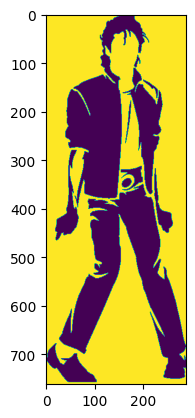

In [20]:
#sqrt_array = np.sqrt(who_criba)
#sqrt_array = np.sqrt(who_array)
#print(sqrt_array[0:100])
#is_square = sqrt_array == np.floor(sqrt_array)
#squares = who_criba[is_square]
#print(squares.size)
#print(squares[0:100])
import matplotlib.pyplot as plt
good_ones_bad_ones = who_criba < 1521
#the_truth = who_criba[good_ones_bad_ones]

#print (the_truth[0:100])
print (good_ones_bad_ones.shape)

import matplotlib
#print (the_good_ones.reshape(-1,3))
#the_truth = the_truth.reshape(2,-1)
#print (the_good_ones_rect)
#matplotlib.pyplot.imshow (the_good_ones.reshape(3,-1))

rect_good_ones_bad_ones = good_ones_bad_ones.reshape(-1, 3**3 * 2**6)

slices = np.array_split (rect_good_ones_bad_ones, 6, axis=1)

# Now, put the slices back together vertically
reconstructed_matrix = np.vstack(slices) # hsplit(rect_good_ones_bad_ones6)

matplotlib.pyplot.imshow (good_ones_bad_ones.reshape(-1, 3**3 * 2**6))
matplotlib.pyplot.imshow (reconstructed_matrix)

#print(indices)
#correct_index = index - 1
#print(correct_index)

#the_good_ones = who_criba [correct_index]

#print (the_good_ones)
#print (the_good_ones.shape)

# Find the index of the most frequent element
#max_index = np.argmax(counts)
# Get the most frequent element and its count
#most_frequent_element = unique_elements[max_index]
#frequency = counts[max_index]
#print("Most frequent element:", most_frequent_element)
#print("Frequency:", frequency)

## Pista 4
La verdadera verdadera información se puede acomodar no sólo como una lista, sino como un rectángulo.
- ¿Qué posibilidades de acomodo existen?

Al visualizar la información de manera rectangular, obtendremos una guía a la paz mundial.

- Acomoda los datos en un rectángulo bidimensional
- Después decide cuál rectángulo representa información visual adecuada, imprimiendo los datos con la función ```matplotlib.pyplot.imshow```

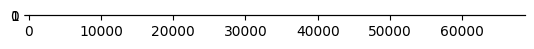

In [ ]:
import matplotlib
#print (the_good_ones.reshape(-1,3))
the_truth = the_truth.reshape(2,-1)
#print (the_good_ones_rect)
#matplotlib.pyplot.imshow (the_good_ones.reshape(3,-1))
matplotlib.pyplot.imshow (the_truth)

#matplotlib.pyplot.imshow (the_good_ones.reshape(5,-1))
#matplotlib.pyplot.imshow (the_good_ones.reshape(6,-1))


#matplotlib.pyplot.imshow (the_good_ones_rect)

## Pista 5
Los monjes cometieron un error y rompieron la imagen en 6 partes, pero al unirlas nuevamente, equivocaron el orden y las unieron en horizontal en vez de en vertical.
- Separa la imagen en 6 partes de manera horizontal
- Vuelve a juntar las partes, pero ahora de manera vertical.

## ¡Enhorabuena!
Seguramente has encontrado la solución al enigma. Ahora elige tú una imagen y esconde la información de manera similar. No olvides de enlistar los pasos que lleven a volver a obtener la información encontrada.